Nama: Ahmad Nasrudin Jamil

NIM : 210411100098

Kelas : Pencarian dan Penambangan Web B

# Singular Value Decomposition (SVD)

## Definisi SVD
Singular Value Decomposition (SVD) adalah metode faktorisasi matriks yang digunakan dalam banyak bidang, termasuk statistik, pengolahan sinyal, dan pembelajaran mesin. SVD memungkinkan kita untuk memecah matriks menjadi tiga matriks yang lebih sederhana, yang menyimpan informasi penting tentang struktur data.

## Notasi Matematika
Jika $ A $ adalah matriks berukuran $ m \times n $, maka SVD menyatakan bahwa $ A $ dapat dituliskan sebagai:

$$
A = U \Sigma V^T
$$

di mana:
- $ U $ adalah matriks ortogonal berukuran $ m \times m $ yang berisi vektor singular kiri.
- $ \Sigma $ adalah matriks diagonal berukuran $ m \times n $ yang berisi nilai singular dari $ A $.
- $ V^T $ adalah transpose dari matriks ortogonal berukuran $ n \times n $ yang berisi vektor singular kanan.

## Komponen SVD

1. **Matriks $ U $**:
   - Kolom-kolom dari matriks $ U $ adalah vektor singular kiri.
   - Vektor-vektor ini menggambarkan arah dari data asli dalam ruang dimensi $ m $.
   - $ U $ memiliki sifat ortogonal, yang berarti bahwa $ U^T U = I $, di mana $ I $ adalah matriks identitas.

2. **Matriks $ \Sigma $**:
   - Matriks diagonal $ \Sigma $ berisi nilai singular dari matriks $ A $.
   - Nilai singular adalah akar kuadrat dari nilai eigen dari $ A^T A $ dan $ A A^T $.
   - Nilai-nilai dalam $ \Sigma $ diurutkan dari yang terbesar ke yang terkecil. Nilai singular yang lebih besar menunjukkan arah yang memiliki lebih banyak variasi dalam data.

3. **Matriks $ V^T $**:
   - Kolom-kolom dari matriks $ V^T $ adalah vektor singular kanan.
   - Vektor-vektor ini menunjukkan arah dari data dalam ruang dimensi $ n $.
   - Seperti $ U $, matriks $ V $ juga ortogonal, yang berarti bahwa $ V^T V = I $.

## Aplikasi SVD
SVD memiliki banyak aplikasi dalam berbagai bidang, antara lain:

1. **Pengurangan Dimensi**:
   - SVD digunakan untuk mengurangi dimensi data dengan memilih sejumlah kecil nilai singular dan kolom dari matriks $ U $ dan $ V^T $. Ini sering digunakan dalam analisis data dan pemodelan statistik untuk menghilangkan noise dan redundansi.

2. **Rekomendasi Sistem**:
   - Dalam sistem rekomendasi, SVD dapat digunakan untuk mendekomposisi matriks preferensi pengguna-item, membantu untuk memprediksi preferensi pengguna terhadap item yang belum mereka lihat.

3. **Pemrosesan Citra**:
   - SVD digunakan dalam pengolahan citra untuk kompresi citra dan pengenalan pola. Dengan menyimpan hanya nilai singular terbesar, kita dapat mengompresi citra sambil mempertahankan kualitas yang cukup baik.

4. **Pengenalan Suara dan Bahasa**:
   - SVD digunakan dalam pengenalan suara dan analisis teks untuk mengekstraksi fitur-fitur penting dari data suara dan teks.

## Proses SVD
Berikut adalah langkah-langkah umum dalam proses SVD:

1. **Menghitung SVD**:
   - Hitung SVD dari matriks $ A $ untuk mendapatkan matriks $ U $, $ \Sigma $, dan $ V^T $.

2. **Mengurangi Dimensi**:
   - Pilih sejumlah nilai singular terbesar (misalnya, dua atau tiga) dan buat matriks baru $ \Sigma' $ yang hanya menyimpan nilai singular yang dipilih.

3. **Membentuk Matriks Baru**:
   - Gunakan matriks $ U $ dan $ V^T $ yang sesuai untuk membentuk matriks baru:

   $$
   A' = U' \Sigma' V'^T
   $$

   di mana $ U' $ dan $ V' $ adalah kolom yang sesuai dari $ U $ dan $ V $.

4. **Rekonstruksi**:
   - Matriks baru $ A' $ adalah representasi terkompresi dari matriks asli $ A $.


### Contoh Dekomposisi Matriks dengan SVD

#### Matriks Awal
Mari kita mulai dengan mendefinisikan matriks $A$:

$$
A = \begin{bmatrix}
4 & 0 & 0 \\
3 & -5 & 0 \\
0 & 0 & 3
\end{bmatrix}
$$

#### Langkah 1: Menghitung SVD
Ketika kita menerapkan SVD, kita akan mendapatkan tiga matriks:

1. **Matriks U** (Matriks Singular Kiri):
   - Merupakan matriks ortogonal yang kolom-kolomnya adalah vektor singular kiri.
   
   $$ 
   U = \begin{bmatrix}
   0.7071 & 0 & 0.7071 \\
   0.7071 & -0.7071 & 0 \\
   0 & 0.7071 & 0.7071
   \end{bmatrix}
   $$

2. **Matriks $\Sigma$** (Matriks Diagonal):
   - Merupakan matriks diagonal yang berisi nilai singular dari matriks $A$. Nilai-nilai ini adalah akar kuadrat dari nilai eigen dari $A^T A$.

   $$
   \Sigma = \begin{bmatrix}
   5.831 & 0 & 0 \\
   0 & 4.000 & 0 \\
   0 & 0 & 3.000
   \end{bmatrix}
   $$

3. **Matriks $V^T$** (Matriks Singular Kanan):
   - Merupakan matriks ortogonal yang kolom-kolomnya adalah vektor singular kanan.

   $$
   V^T = \begin{bmatrix}
   1 & 0 & 0 \\
   0 & 1 & 0 \\
   0 & 0 & 1
   \end{bmatrix}
   $$

#### Langkah 2: Rekonstruksi Matriks
Kita dapat merekonstruksi matriks $A$ dari hasil SVD:

$$
A' = U \Sigma V^T
$$

Dengan menggunakan $U$, $\Sigma$, dan $V^T$, kita akan mendapatkan kembali matriks asli $A$ dengan ketelitian yang cukup tinggi.

$$
A' \approx \begin{bmatrix}
4 & 0 & 0 \\
3 & -5 & 0 \\
0 & 0 & 3
\end{bmatrix}
$$

### Kesimpulan
Singular Value Decomposition (SVD) adalah alat yang kuat untuk menganalisis dan memanipulasi data matriks. Dengan menguraikan matriks menjadi komponen-komponen yang lebih sederhana, SVD membantu dalam pengurangan dimensi, kompresi data, dan banyak aplikasi analisis data lainnya. Sifat ortogonal dari matriks $ U $ dan $ V $ serta informasi penting yang terkandung dalam matriks $ \Sigma $ menjadikan SVD sebagai metode yang fundamental dalam ilmu data dan statistika.


# Implementasi

## Library yang digunakan

In [1]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from numpy import array, diag, zeros
from scipy.linalg import svd
from numpy import array
from sklearn.decomposition import TruncatedSVD

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\EBC
[nltk_data]     KOMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
file_id = '1-tr5TV3kjdvsHocZM3f7KoDA_ZEIAJwR'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'crawling_2_kategori.csv'

# Unduh file dari Google Drive
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-tr5TV3kjdvsHocZM3f7KoDA_ZEIAJwR
To: C:\Users\EBC KOMPUTER\Documents\Jupyter Notebook\PPW\Tugas 6\crawling_2_kategori.csv
100%|███████████████████████████████████████████████████████████████████████████████| 260k/260k [00:00<00:00, 2.10MB/s]


'crawling_2_kategori.csv'

In [4]:
# Membaca file CSV ke DataFrame
df = pd.read_csv(output)

## Contoh Sederhana Implementasi SVD

In [5]:
A = array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])
print("Original Matrix A:\n", A)

# Singular-value decomposition
U, s, VT = svd(A)

# Display U, s (singular values), and VT
print("\nMatrix U (Left Singular Vectors):\n", U)
print("\nSingular Values (s):\n", s)
print("\nMatrix VT (Right Singular Vectors Transpose):\n", VT)

# Create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
Sigma[:A.shape[0], :A.shape[0]] = diag(s)

print("\nMatrix Sigma (Diagonal Matrix with Singular Values):\n", Sigma)

# Select the number of components to keep
n_elements = 3
Sigma_reduced = Sigma[:, :n_elements]
VT_reduced = VT[:n_elements, :]

print("\nReduced Sigma Matrix:\n", Sigma_reduced)
print("\nReduced VT Matrix:\n", VT_reduced)

# Reconstruct A using reduced components
B = U.dot(Sigma_reduced.dot(VT_reduced))
print("\nReconstructed Matrix B (Approximation of A):\n", B)

# Transformations
T1 = U.dot(Sigma_reduced)
print("\nTransformation T1 (U * Reduced Sigma):\n", T1)

T2 = A.dot(VT_reduced.T)
print("\nTransformation T2 (A * Reduced VT.T):\n", T2)

Original Matrix A:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

Matrix U (Left Singular Vectors):
 [[ 0.20673589  0.88915331  0.40824829]
 [ 0.51828874  0.25438183 -0.81649658]
 [ 0.82984158 -0.38038964  0.40824829]]

Singular Values (s):
 [2.54368356e+01 1.72261225e+00 5.14037515e-16]

Matrix VT (Right Singular Vectors Transpose):
 [[ 0.40361757  0.46474413  0.52587069  0.58699725]
 [-0.73286619 -0.28984978  0.15316664  0.59618305]
 [ 0.44527162 -0.83143156  0.32704826  0.05911168]
 [ 0.3189564  -0.09338934 -0.77009054  0.54452347]]

Matrix Sigma (Diagonal Matrix with Singular Values):
 [[2.54368356e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.72261225e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.14037515e-16 0.00000000e+00]]

Reduced Sigma Matrix:
 [[2.54368356e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.72261225e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.14037515e-16]]

Reduced VT Matrix:
 [[ 0.40361757  0.46474

In [6]:
A = array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])
print("\nMatrix A\n", A)
# svd
svd = TruncatedSVD(n_components=3)
svd.fit(A)
result = svd.transform(A)
print("\nHasil\n", result)


Matrix A
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

Hasil
 [[ 5.25870689e+00 -1.53166638e+00  0.00000000e+00]
 [ 1.31836254e+01 -4.38201263e-01 -8.88178420e-16]
 [ 2.11085440e+01  6.55263852e-01 -1.77635684e-15]]


## Implementasi Code

### Dataset

In [7]:
df

,title,content,date,category
0,Apa yang Harus Dilakukan jika Obesitas? Ini Re...,KOMPAS.com - Orang dengan obesitas lebih mungk...,18/09/2024,HEALTH
1,Apakah Baik Makan Buah untuk Sarapan? Ini Penj...,KOMPAS.com - Buah bisa menjadi pilihan menu ya...,18/09/2024,HEALTH
2,Tanda Malanutrisi pada Anak dan Dewasa,KOMPAS.com - Malanutrisi merupakan masalah kes...,18/09/2024,HEALTH
3,"Anak Sering Berkeringat Saat Tidur, Tanda Peny...",KOMPAS.com - Berkeringat merupakan cara alami ...,18/09/2024,HEALTH
4,"Kenali Perkembangan Motorik Normal pada Bayi, ...",KOMPAS.com - Ikatan Dokter Anak Indonesia (IDA...,18/09/2024,HEALTH
...,...,...,...,...
95,"9 Tips ke Jak-Japan Matsuri 2024, Bisa Beli Ti...","JAKARTA, KOMPAS.com - Ribuan orang nampak berg...",15/09/2024,TRAVEL
96,Waktu Terbaik Lihat Hiu Paus di Botubarani Gor...,KOMPAS.com - Provinsi Gorontalo di Pulau Sulaw...,14/09/2024,TRAVEL
97,14 orang Ditangkap Akibat Pendakian Ilegal di ...,KOMPAS.com - Jalur pendakian yang indah di Haw...,14/09/2024,TRAVEL
98,"Harga Paket Outbound Pondok Zidane, Banyak Pil...",KOMPAS.com - Menikmati waktu berkualitas bersa...,14/09/2024,TRAVEL


### Jumlah Dataset Per Label

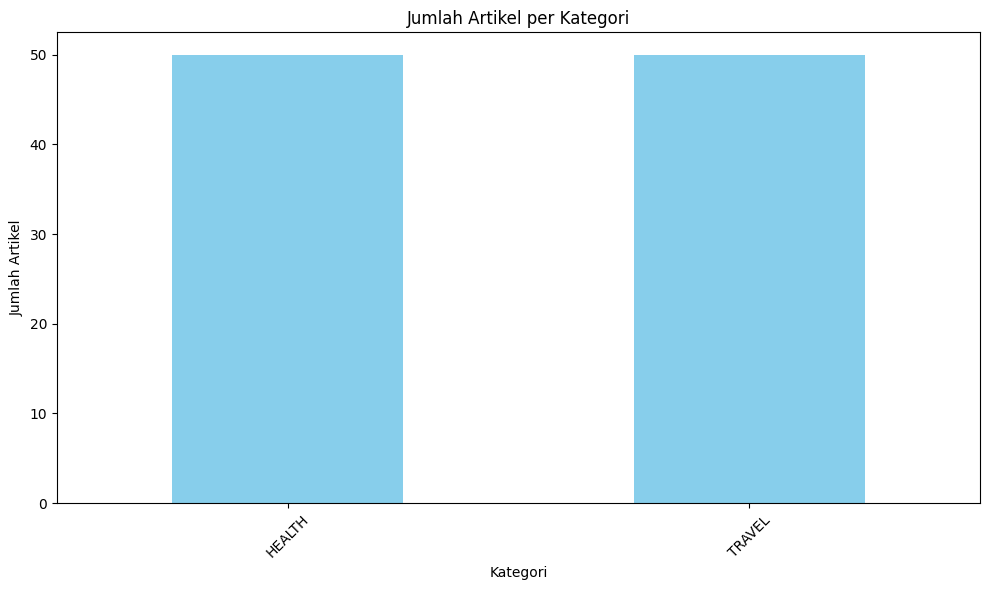

In [8]:
# Hitung jumlah artikel per kategori
category_counts = df['category'].value_counts()

# Tampilkan grafik batang
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Artikel per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Artikel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Preprocessing

#### Lower Case

In [9]:
df['lower_text'] = df['content'].str.lower()

df[['content', 'lower_text']]

,content,lower_text
0,KOMPAS.com - Orang dengan obesitas lebih mungk...,kompas.com - orang dengan obesitas lebih mungk...
1,KOMPAS.com - Buah bisa menjadi pilihan menu ya...,kompas.com - buah bisa menjadi pilihan menu ya...
2,KOMPAS.com - Malanutrisi merupakan masalah kes...,kompas.com - malanutrisi merupakan masalah kes...
3,KOMPAS.com - Berkeringat merupakan cara alami ...,kompas.com - berkeringat merupakan cara alami ...
4,KOMPAS.com - Ikatan Dokter Anak Indonesia (IDA...,kompas.com - ikatan dokter anak indonesia (ida...
...,...,...
95,"JAKARTA, KOMPAS.com - Ribuan orang nampak berg...","jakarta, kompas.com - ribuan orang nampak berg..."
96,KOMPAS.com - Provinsi Gorontalo di Pulau Sulaw...,kompas.com - provinsi gorontalo di pulau sulaw...
97,KOMPAS.com - Jalur pendakian yang indah di Haw...,kompas.com - jalur pendakian yang indah di haw...
98,KOMPAS.com - Menikmati waktu berkualitas bersa...,kompas.com - menikmati waktu berkualitas bersa...


#### Cleansing Text

In [10]:
df['cleaned_text'] = df['lower_text'].apply(lambda text: re.sub(r'[^a-zA-Z]', ' ', text))

df[['lower_text', 'cleaned_text']]

,lower_text,cleaned_text
0,kompas.com - orang dengan obesitas lebih mungk...,kompas com orang dengan obesitas lebih mungk...
1,kompas.com - buah bisa menjadi pilihan menu ya...,kompas com buah bisa menjadi pilihan menu ya...
2,kompas.com - malanutrisi merupakan masalah kes...,kompas com malanutrisi merupakan masalah kes...
3,kompas.com - berkeringat merupakan cara alami ...,kompas com berkeringat merupakan cara alami ...
4,kompas.com - ikatan dokter anak indonesia (ida...,kompas com ikatan dokter anak indonesia ida...
...,...,...
95,"jakarta, kompas.com - ribuan orang nampak berg...",jakarta kompas com ribuan orang nampak berg...
96,kompas.com - provinsi gorontalo di pulau sulaw...,kompas com provinsi gorontalo di pulau sulaw...
97,kompas.com - jalur pendakian yang indah di haw...,kompas com jalur pendakian yang indah di haw...
98,kompas.com - menikmati waktu berkualitas bersa...,kompas com menikmati waktu berkualitas bersa...


#### Tokenisasi

In [11]:
df['tokenized_text'] = df['cleaned_text'].apply(lambda text: text.split())

df[['cleaned_text', 'tokenized_text']]

,cleaned_text,tokenized_text
0,kompas com orang dengan obesitas lebih mungk...,"[kompas, com, orang, dengan, obesitas, lebih, ..."
1,kompas com buah bisa menjadi pilihan menu ya...,"[kompas, com, buah, bisa, menjadi, pilihan, me..."
2,kompas com malanutrisi merupakan masalah kes...,"[kompas, com, malanutrisi, merupakan, masalah,..."
3,kompas com berkeringat merupakan cara alami ...,"[kompas, com, berkeringat, merupakan, cara, al..."
4,kompas com ikatan dokter anak indonesia ida...,"[kompas, com, ikatan, dokter, anak, indonesia,..."
...,...,...
95,jakarta kompas com ribuan orang nampak berg...,"[jakarta, kompas, com, ribuan, orang, nampak, ..."
96,kompas com provinsi gorontalo di pulau sulaw...,"[kompas, com, provinsi, gorontalo, di, pulau, ..."
97,kompas com jalur pendakian yang indah di haw...,"[kompas, com, jalur, pendakian, yang, indah, d..."
98,kompas com menikmati waktu berkualitas bersa...,"[kompas, com, menikmati, waktu, berkualitas, b..."


#### Stopword Removal

In [12]:
stop_words = set(stopwords.words('indonesian'))

custom_stopwords = {'kompas', 'com'}
stop_words.update(custom_stopwords)

df['no_stopwords_text'] = df['tokenized_text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

df[['tokenized_text', 'no_stopwords_text']]

,tokenized_text,no_stopwords_text
0,"[kompas, com, orang, dengan, obesitas, lebih, ...","[orang, obesitas, mengalami, kesehatan, berpot..."
1,"[kompas, com, buah, bisa, menjadi, pilihan, me...","[buah, pilihan, menu, ringan, bagus, dikonsums..."
2,"[kompas, com, malanutrisi, merupakan, masalah,...","[malanutrisi, kesehatan, serius, indonesia, me..."
3,"[kompas, com, berkeringat, merupakan, cara, al...","[berkeringat, alami, tubuh, mendinginkan, oran..."
4,"[kompas, com, ikatan, dokter, anak, indonesia,...","[ikatan, dokter, anak, indonesia, idai, geraka..."
...,...,...
95,"[jakarta, kompas, com, ribuan, orang, nampak, ...","[jakarta, ribuan, orang, nampak, bergantian, f..."
96,"[kompas, com, provinsi, gorontalo, di, pulau, ...","[provinsi, gorontalo, pulau, sulawesi, utara, ..."
97,"[kompas, com, jalur, pendakian, yang, indah, d...","[jalur, pendakian, indah, hawaii, dinikmati, p..."
98,"[kompas, com, menikmati, waktu, berkualitas, b...","[menikmati, berkualitas, keluarga, teman, tema..."


#### Stemming

In [13]:
# Membuat objek Stemmer dari Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Menggunakan Sastrawi untuk stemming teks
df['stemmed_text'] = df['no_stopwords_text'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])
df['final_text'] = df['stemmed_text'].apply(lambda x: ' '.join(x))

df[['no_stopwords_text', 'final_text']]

,no_stopwords_text,final_text
0,"[orang, obesitas, mengalami, kesehatan, berpot...",orang obesitas alami sehat potensi serius atas...
1,"[buah, pilihan, menu, ringan, bagus, dikonsums...",buah pilih menu ringan bagus konsumsi sarap ku...
2,"[malanutrisi, kesehatan, serius, indonesia, me...",malanutrisi sehat serius indonesia duduk perin...
3,"[berkeringat, alami, tubuh, mendinginkan, oran...",keringat alami tubuh dingin orang dewasa anak ...
4,"[ikatan, dokter, anak, indonesia, idai, geraka...",ikat dokter anak indonesia ida gera motorik an...
...,...,...
95,"[jakarta, ribuan, orang, nampak, bergantian, f...",jakarta ribu orang nampak ganti festival seni ...
96,"[provinsi, gorontalo, pulau, sulawesi, utara, ...",provinsi gorontalo pulau sulawesi utara kenal ...
97,"[jalur, pendakian, indah, hawaii, dinikmati, p...",jalur daki indah hawaii nikmat unjung dunia go...
98,"[menikmati, berkualitas, keluarga, teman, tema...",nikmat kualitas keluarga teman teman seru pili...


### TF-IDF

In [14]:
# Menghitung TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['final_text'] )

# Mengambil nama fitur (kata-kata)
terms = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
tfidf_df

,abad,abadi,abai,abang,abar,abdi,abdullah,abu,abuan,ac,...,yudi,yunani,zaman,zat,zeus,zhongli,zidane,zona,zone,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.03389,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.381695,0.0,0.0,0.0


In [15]:
fitur_kata = vectorizer.get_feature_names_out()

print("Jumlah fitur kata dari hasil TF-IDF:", len(fitur_kata))

Jumlah fitur kata dari hasil TF-IDF: 3470


### SVD

In [16]:
n_components = 100  # jumlah komponen yang diinginkan
svd = TruncatedSVD(n_components=n_components)
reduced_tfidf = svd.fit_transform(tfidf_matrix)

# Membuat DataFrame dari hasil reduksi
reduced_tfidf_df = pd.DataFrame(reduced_tfidf)

# Menampilkan hasil reduksi
reduced_tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.221261,0.129352,-0.001476,0.002086,-0.032853,0.036355,-0.072935,0.196265,-0.130849,-0.095264,...,-0.010455,0.003266,-0.007182,-0.000051,0.003700,0.003875,0.001513,-0.002886,-0.001831,0.000639
1,0.368457,0.295747,-0.013408,-0.004637,-0.266339,-0.083245,0.078176,-0.112362,0.086359,-0.016001,...,-0.047288,0.007008,-0.004758,-0.008551,-0.036038,0.001007,0.000377,0.001633,0.001608,-0.001376
2,0.231478,0.049969,-0.000695,0.006299,-0.030270,0.085449,-0.101350,0.255336,-0.118431,-0.110462,...,-0.011271,-0.001844,0.003753,-0.005854,0.001498,0.003763,0.001739,-0.000786,0.002444,-0.001105
3,0.163754,-0.000431,-0.025925,-0.041202,0.013025,0.030509,-0.057942,0.210415,-0.085078,-0.046613,...,-0.001158,0.000962,0.005661,-0.005402,0.002034,-0.005532,0.001807,0.002835,-0.001208,-0.001142
4,0.118518,0.016843,-0.011928,-0.015334,0.083621,0.028081,-0.035692,0.102893,-0.042758,0.002825,...,-0.004967,-0.001930,-0.001636,-0.002630,0.001243,0.002885,0.000698,0.006356,-0.002290,-0.000705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.245075,-0.300949,-0.045561,0.741992,0.049218,-0.236521,0.042576,0.003044,-0.009738,-0.006570,...,0.006153,-0.081332,0.057338,-0.259607,-0.019863,0.067220,0.042261,-0.070758,-0.074679,-0.009141
96,0.142125,-0.159811,0.887104,-0.102525,0.031707,-0.147802,0.140653,0.044669,0.001949,0.005533,...,-0.022150,-0.064582,-0.014156,-0.056717,0.048827,-0.057404,-0.225753,-0.003576,0.047690,-0.190362
97,0.095122,-0.056335,0.033442,0.008734,-0.007943,0.045214,-0.070887,-0.021102,-0.027214,-0.002286,...,-0.000218,-0.002023,0.003518,-0.003984,-0.001307,-0.000186,-0.001156,-0.000632,-0.000846,0.000328
98,0.198359,-0.162505,-0.044178,-0.064691,0.006075,-0.022337,-0.009762,0.081439,0.080633,-0.047537,...,0.001130,0.003776,0.006377,-0.000202,-0.000756,0.008608,0.005561,-0.003847,0.004313,-0.005261
